In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Function to calculate relative percentage to be used in the bar charts
def calculate_percentage(counts, total):
    return {key: (value / total) * 100 if total > 0 else 0 for key, value in counts.items()}

In [3]:
base_dir = os.getcwd()  # Get the script's directory
output_dir = os.path.join(base_dir, "..", "..", "output")

file_path = os.path.join(output_dir, "preprocessed_data.xlsx")
df = pd.read_excel(file_path)

In [4]:
df.sample(5)

,Message_ID,Date,Message,Text_Comments,Text_Positive_Reactions,Text_Negative_Reactions,Media File,Media_Comments,Media_Positive_Reactions,Media_Negative_Reactions
135,13262,2025-01-18 23:33:01,"🇺🇸🇵🇸🇮🇱⚡️- ""Both Trump and Biden have given the...","['GOD bless and protect Israel forever 🇮🇱', ""T...",94,6,NaN,NaN,0,0
1233,1755,2024-12-08 09:47:21,⚡️JUST IN\n\nIsraeli tanks are invading Syria'...,"['No corn. I mean it.', 'Okay adios', '', '']",0,0,D:\media\israel_1755.jpg,"['No corn. I mean it.', 'Okay adios', '', '']",0,0
2345,1570,2024-11-21 17:19:58,Any country that tries to arrest Israeli PM Ne...,"['LOL', 'Fuck u and fuck netanyahu', 'pola sap...",0,0,NaN,NaN,0,0
522,6370,2025-01-06 19:44:41,US official claims: Israeli army has begun wit...,NaN,0,6,NaN,NaN,0,0
1237,1751,2024-12-08 06:40:39,After the collapse of the Assad regime overnig...,"['ko ada lu ajg', 'oi', 'LoL 🤣🤣😆...you come to...",0,0,NaN,NaN,0,0


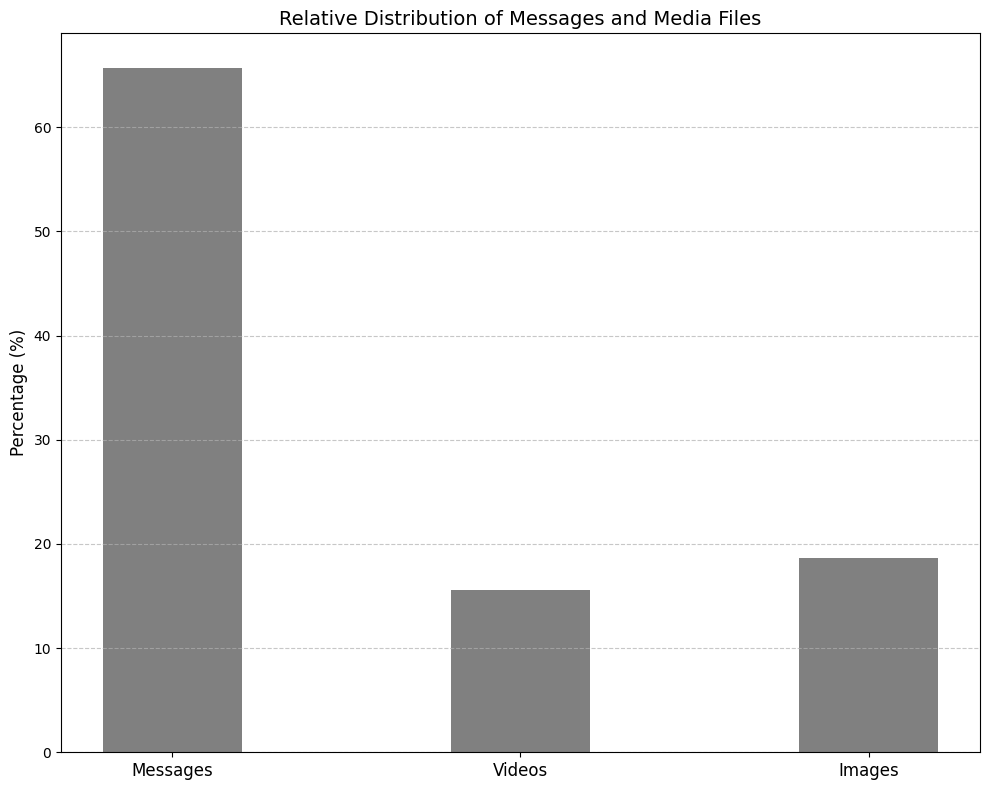

In [7]:
# Remove NaN values in both columns
df_filtered_message = df.dropna(subset=['Message'])
df_filtered_media = df.dropna(subset=['Media File'])

# Count messages (excluding NaN)
msg_count = df_filtered_message['Message'].notna().sum()

# Count videos and images, ignoring NaN
video_count = df_filtered_media['Media File'].dropna().apply(lambda x: x.lower().endswith('.mp4')).sum()
image_count = df_filtered_media['Media File'].dropna().apply(lambda x: not x.lower().endswith('.mp4')).sum()

# Total for relative calculation
total = msg_count + video_count + image_count

# Convert to percentages
data_to_plot = {
    'Messages': (msg_count / total) * 100 if total > 0 else 0,
    'Videos': (video_count / total) * 100 if total > 0 else 0,
    'Images': (image_count / total) * 100 if total > 0 else 0
}

plt.figure(figsize=(10, 8))
plt.bar(range(len(data_to_plot)), data_to_plot.values(), color='gray', width=0.4)  # Reduce width to 0.5

# Customize x-axis to make the bars appear closer
plt.xticks(range(len(data_to_plot)), data_to_plot.keys(), fontsize=12)

plt.title("Relative Distribution of Messages and Media Files", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

image_path = os.path.join(output_dir, "review_rel_dist_of_messages_and_multimedia.png")
plt.savefig(image_path, dpi=300)
plt.show()

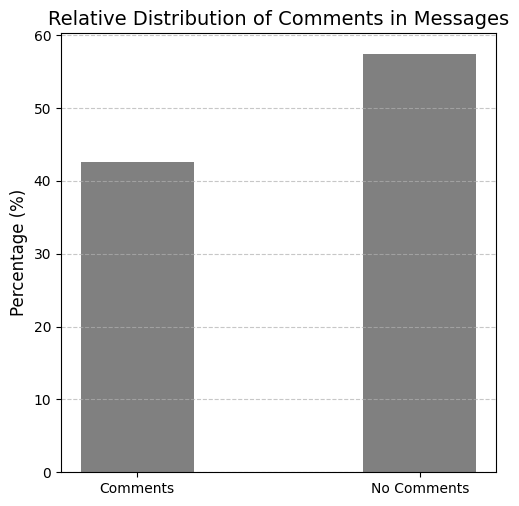

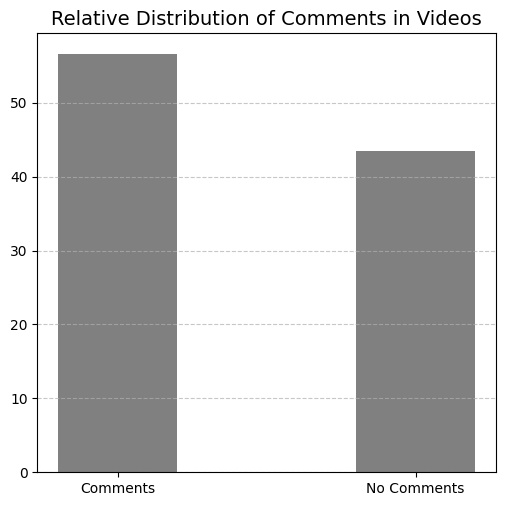

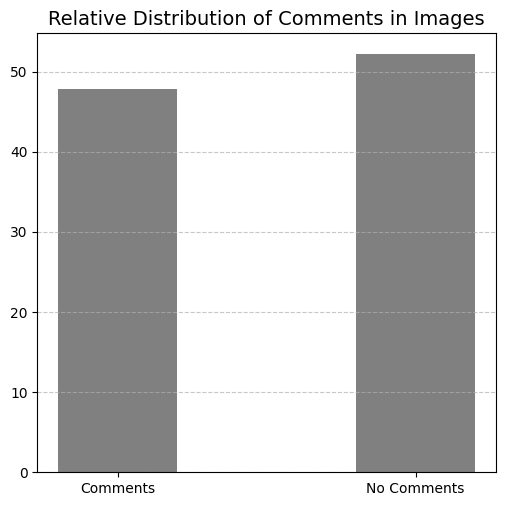

In [6]:
# For Messages:
message_total = len(df)
message_comments = {
    'Comments': df['Text_Comments'].notna().sum(),
    'No Comments': df['Text_Comments'].isna().sum()
}

# Calculate percentages for messages
message_comments_percent = calculate_percentage(message_comments, message_total)

# Separate videos and images
video_condition = df['Media File'].apply(lambda x: isinstance(x, str) and x.lower().endswith('.mp4'))
image_condition = df['Media File'].apply(lambda x: isinstance(x, str) and not x.lower().endswith('.mp4'))

# Calculate counts for Media Comments and No Comments
media_comments_video = {
    'Comments': df[video_condition]['Media_Comments'].notna().sum(),
    'No Comments': df[video_condition]['Media_Comments'].isna().sum()
}

media_comments_image = {
    'Comments': df[image_condition]['Media_Comments'].notna().sum(),
    'No Comments': df[image_condition]['Media_Comments'].isna().sum()
}

# Calculate percentages for videos and images
media_comments_percent_video = calculate_percentage(media_comments_video, len(df[video_condition]))
media_comments_percent_image = calculate_percentage(media_comments_image, len(df[image_condition]))

# Plot for Message
plt.figure(figsize=(5, 5))
plt.bar(['Comments', 'No Comments'], message_comments_percent.values(), color='gray', width=0.4)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Relative Distribution of Comments in Messages", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_comments_in_messages.png"), dpi=300)
plt.show()

# Plot for Video
plt.figure(figsize=(5, 5))
plt.bar(['Comments', 'No Comments'], media_comments_percent_video.values(), color='gray', width=0.4)
plt.title("Relative Distribution of Comments in Videos", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_comments_in_videos.png"), dpi=300)
plt.show()

# Plot for Image
plt.figure(figsize=(5, 5))
plt.bar(['Comments', 'No Comments'], media_comments_percent_image.values(), color='gray', width=0.4)
plt.title("Relative Distribution of Comments in Images", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_comments_in_images.png"), dpi=300)
plt.show()

In [99]:
msg_count

np.int64(2184)

In [100]:
video_count

np.int64(518)

In [101]:
image_count

np.int64(621)

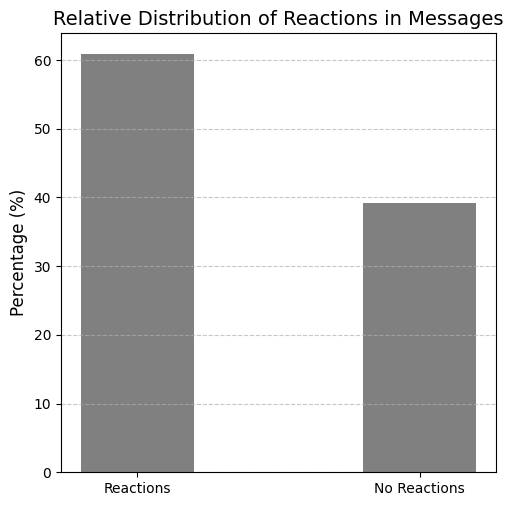

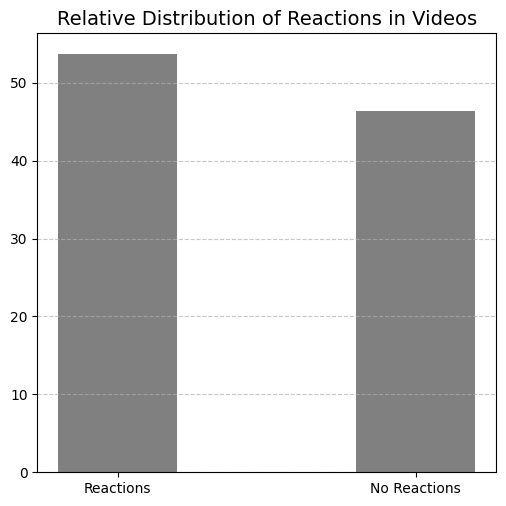

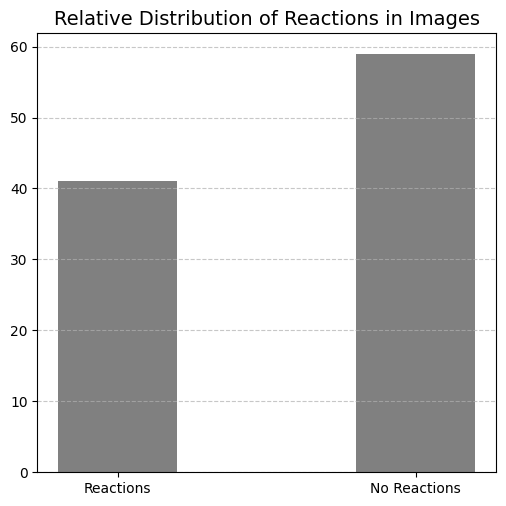

In [116]:
# For Messages:
df['Total_Text_Reactions'] = df['Text_Positive_Reactions'] + df['Text_Negative_Reactions']
df['Total_Media_Reactions'] = df['Media_Positive_Reactions'] + df['Media_Negative_Reactions']


message_reactions = {
    'Reactions': (df['Total_Text_Reactions'] > 0).sum(),
    'No Reactions': (df['Total_Text_Reactions'] == 0).sum()
}


# Calculate percentages for messages
message_reactions_percent = calculate_percentage(message_reactions, message_total)

# Calculate counts for Media Reactions and No Reactions
media_reactions_video = {
    'Reactions': (df[video_condition]['Total_Media_Reactions'] > 0).sum(),
    'No Reactions': (df[video_condition]['Total_Media_Reactions'] == 0).sum()
}


media_reactions_image = {
    'Reactions': (df[image_condition]['Total_Media_Reactions'] > 0).sum(),
    'No Reactions': (df[image_condition]['Total_Media_Reactions'] == 0).sum()
}

video_total = len(df[video_condition])
image_total = len(df[image_condition])

# Calculate percentages for videos and images
video_reactions_percent = calculate_percentage(media_reactions_video, video_total)
image_reactions_percent = calculate_percentage(media_reactions_image, image_total)


# Plot for Message
plt.figure(figsize=(5, 5))
plt.bar(['Reactions', 'No Reactions'], message_reactions_percent.values(), color='gray', width=0.4)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Relative Distribution of Reactions in Messages", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_reactions_in_messages.png"), dpi=300)
plt.show()

# Plot for Video
plt.figure(figsize=(5, 5))
plt.bar(['Reactions', 'No Reactions'], video_reactions_percent.values(), color='gray', width=0.4)
plt.title("Relative Distribution of Reactions in Videos", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_reactions_in_videos.png"), dpi=300)
plt.show()

# Plot for Image
plt.figure(figsize=(5, 5))
plt.bar(['Reactions', 'No Reactions'], image_reactions_percent.values(), color='gray', width=0.4)
plt.title("Relative Distribution of Reactions in Images", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, "review_rel_dist_of_reactions_in_images.png"), dpi=300)
plt.show()